### Objective: Build Multi-Class Classifier for Astronomical Objects

# Loading Libraries

In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

#Loading Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projects/Astronomical Object Classification/star_classification.csv")

In [ ]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


# Data Checks

Preliminary observations:
*   100,000 rows and 18 columns.
*   Target column name = "class".





In [ ]:
# check null values
print(f"Count of null values below:\n {df.isnull().sum()}\n")
# check data types for columns
print(f"Data types for each column:\n {df.dtypes} ")

Count of null values below:
 obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Data types for each column:
 obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object 


In [ ]:
# columns to remove: "obj_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "spec_obj_ID", "plate", "MJD", "fiber_ID"
# dropping unecessary columns

df.drop(["obj_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "spec_obj_ID", "plate", "MJD", "fiber_ID"],axis=1, inplace=True)

In [ ]:
df

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040


In [ ]:
df.duplicated().sum() # check for duplicate records

0

# Data Exploration

In [ ]:
df.describe()

,alpha,delta,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


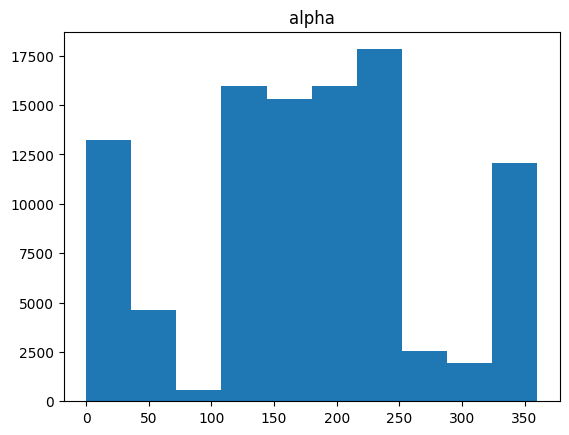

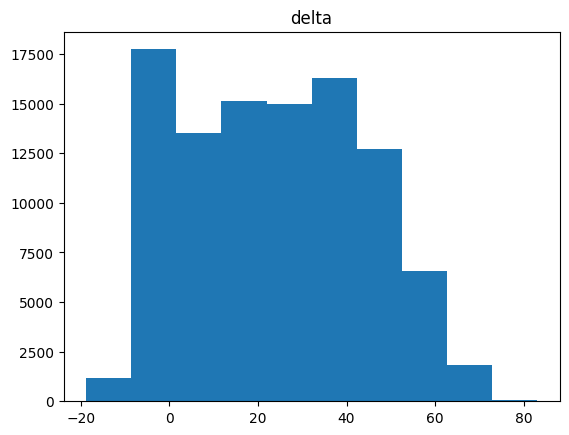

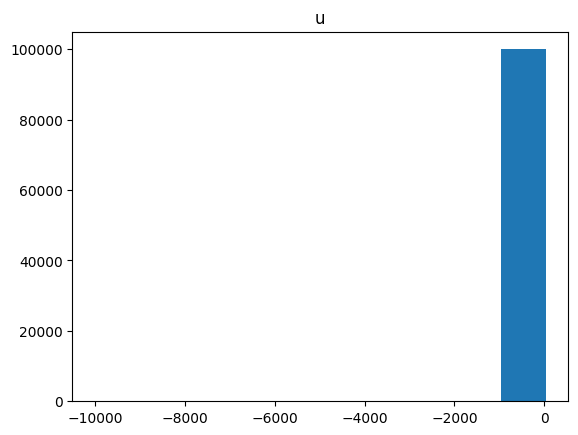

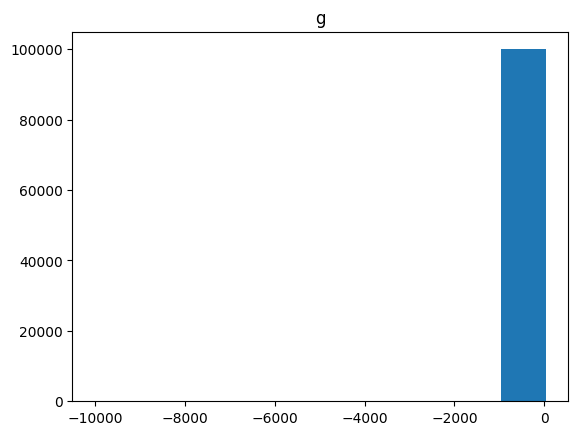

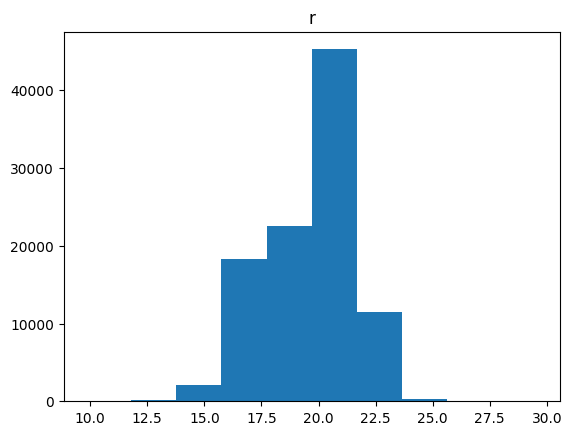

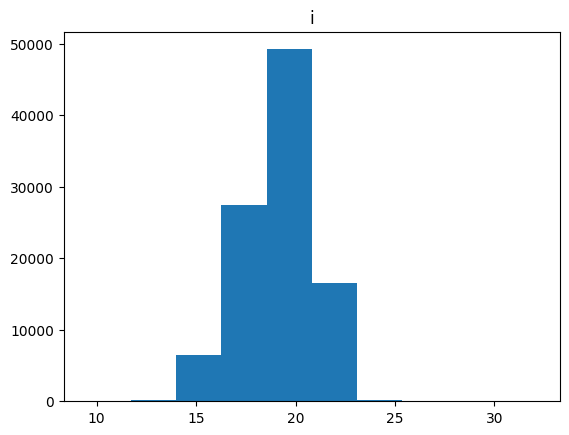

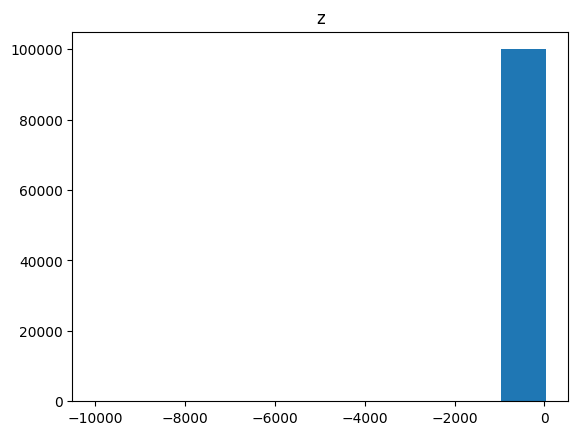

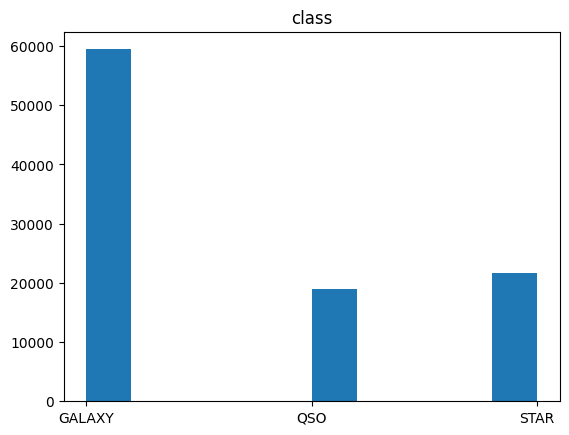

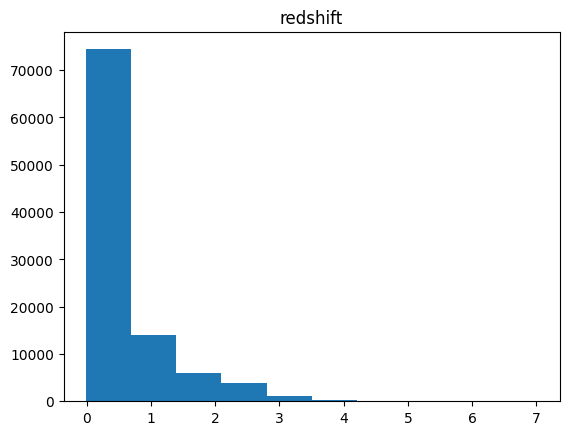

In [ ]:
for col in df.columns:
  # if col != "class":
    plt.hist(df[col])
    plt.title(col)
    plt.show()

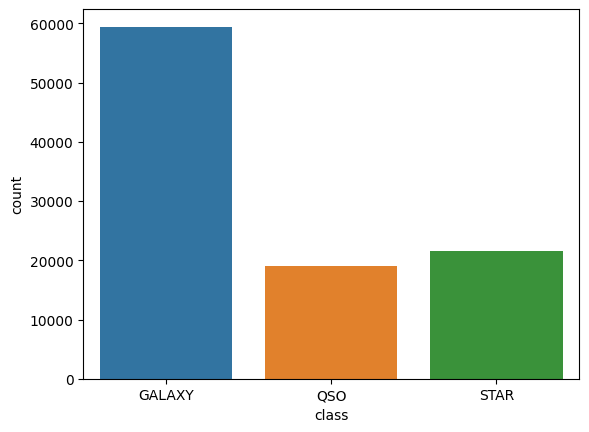

In [ ]:
# count plot on single categorical variable
sns.countplot(x ="class", data = df)
# Show the plot
plt.show()

In [ ]:
df["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

Post Check Observations:
*   No Duplicate records
*   No null values
*   Unbalanced classes Galaxy is class with majority proportion

# Model Training

Things to implement:
*   Try cross validation.
*   Try resolving class imbalance.




In [ ]:
X, y = df.drop(["class"],axis=1), df["class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, shuffle=True, stratify=y, random_state=42 )

In [ ]:
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy of Logistic Regression: {accuracy*100} %")

Accuracy of Logistic Regression: 95.544 %


In [ ]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(criterion="entropy", max_depth=2),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayesian": GaussianNB(),
    "Support Vector Machines": SVC(kernel="rbf", gamma=0.5, C=1.0),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(n_components=2),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "KNN":KNeighborsClassifier(n_neighbors=3),
}

for name, model in models.items():
  begin = datetime.datetime.now()
  model.fit(X_train, y_train)
  end = datetime.datetime.now()
  time_taken = end - begin
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  print(f"Accuracy of {name}: {accuracy*100} %")
  print(f"Time taken to Run {name} model: {time_taken}\n")

Accuracy of Logistic Regression: 95.544 %
Time taken to Run Logistic Regression model: 0:00:03.060307

Accuracy of Decision Tree: 94.734 %
Time taken to Run Decision Tree model: 0:00:00.484124

Accuracy of Random Forest: 97.668 %
Time taken to Run Random Forest model: 0:00:20.716219

Accuracy of Naive Bayesian: 92.162 %
Time taken to Run Naive Bayesian model: 0:00:00.172001

Accuracy of Support Vector Machines: 96.154 %
Time taken to Run Support Vector Machines model: 0:00:40.071895

Accuracy of Linear Discriminant Analysis: 84.61 %
Time taken to Run Linear Discriminant Analysis model: 0:00:00.325570

Accuracy of Quadratic Discriminant Analysis: 94.794 %
Time taken to Run Quadratic Discriminant Analysis model: 0:00:00.223127

Accuracy of KNN: 93.27 %
Time taken to Run KNN model: 0:00:00.253132



In [ ]:
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  f_score = f1_score(y_test, y_pred, average="weighted")
  print(f"F score of {name}: {round(f_score*100,3)} %\n")

F score of Logistic Regression: 95.507 %

F score of Decision Tree: 94.585 %

F score of Random Forest: 97.703 %

F score of Naive Bayesian: 92.302 %

F score of Support Vector Machines: 96.142 %

F score of Linear Discriminant Analysis: 84.042 %

F score of Quadratic Discriminant Analysis: 94.841 %

F score of KNN: 93.263 %



Conclusion:
*   Most Classifiers seem to get good results above 90%.
*   Naive Bayes gets 92% accuracy with least time taken.

# Test: Effect of balancing data on model training results.

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(f"Resampled data shape {y_res.shape}")

Resampled data shape (178335,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.50, shuffle=True, stratify=y_res, random_state=42 )
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

In [ ]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(criterion="entropy", max_depth=2),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayesian": GaussianNB(),
    "Support Vector Machines": SVC(kernel="rbf", gamma=0.5, C=1.0),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(n_components=2),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "KNN":KNeighborsClassifier(n_neighbors=3),
}

for name, model in models.items():
  begin = datetime.datetime.now()
  model.fit(X_train, y_train)
  end = datetime.datetime.now()
  time_taken = end - begin
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  print(f"Accuracy of {name}: {accuracy*100} %")
  print(f"Time taken to Run {name} model: {time_taken}\n")

Accuracy of Logistic Regression: 95.65090615467432 %
Time taken to Run Logistic Regression model: 0:00:04.252234

Accuracy of Decision Tree: 94.05392068903643 %
Time taken to Run Decision Tree model: 0:00:00.910064

Accuracy of Random Forest: 98.05311322447515 %
Time taken to Run Random Forest model: 0:00:33.033678

Accuracy of Naive Bayesian: 92.85169567557868 %
Time taken to Run Naive Bayesian model: 0:00:00.206980

Accuracy of Support Vector Machines: 96.95069980261978 %
Time taken to Run Support Vector Machines model: 0:01:41.993148

Accuracy of Linear Discriminant Analysis: 81.04140498833662 %
Time taken to Run Linear Discriminant Analysis model: 0:00:00.510379

Accuracy of Quadratic Discriminant Analysis: 95.93127579400682 %
Time taken to Run Quadratic Discriminant Analysis model: 0:00:00.221401

Accuracy of KNN: 95.20343621029966 %
Time taken to Run KNN model: 0:00:00.335997



In [ ]:
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  f_score = f1_score(y_test, y_pred, average="weighted")
  print(f"F score of {name}: {round(f_score*100,3)} %\n")

F score of Logistic Regression: 95.632 %

F score of Decision Tree: 94.033 %

F score of Random Forest: 98.062 %

F score of Naive Bayesian: 92.847 %

F score of Support Vector Machines: 96.943 %

F score of Linear Discriminant Analysis: 81.183 %

F score of Quadratic Discriminant Analysis: 95.931 %

F score of KNN: 95.195 %



Notes:
*   Accuracy and Run time is similar to before balancing dataset.
*   F1 score



# Test: Cross Validation effect on Model results

In [ ]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(criterion="entropy", max_depth=2),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayesian": GaussianNB(),
    "Support Vector Machines": SVC(kernel="rbf", gamma=0.5, C=1.0),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(n_components=2),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "KNN":KNeighborsClassifier(n_neighbors=3),
}

for name, model in models.items():
k_folds = StratifiedKFold(n_splits=5)
cross_val_score(model,X,y,cv = k_folds)


# Final Trained Model

In [ ]:
# Final Model: Naive Bayesian Classifier

#reading data
df = pd.read_csv("/content/drive/MyDrive/Projects/Astronomical Object Classification/star_classification.csv")

# dropping unecessary columns
df.drop(["obj_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "spec_obj_ID", "plate", "MJD", "fiber_ID"],axis=1, inplace=True)

# Splitting data into train and test sets
X, y = df.drop(["class"],axis=1), df["class"]

# Proportioning data into 50/50 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, shuffle=True, stratify=y, random_state=42 )

# scaling data
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

# training model
model = GaussianNB()
model.fit(X_train, y_train)

# predicting target class
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy of Logistic Regression: {accuracy*100} %")

Accuracy of Logistic Regression: 92.162 %
